In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/DSNikhil/Downloads/Codes and Corresponding files/ETM each day all trips superset/ETM ticketing_3_11.csv")
df_source = df[df['Source']=='KELAMBAKKA']
df_source_destination = df_source[df_source['Destination']=='T.NAGAR   ']

In [6]:
all_stages_19B_dataframe = pd.read_csv("C:/Users/DSNikhil/Downloads/Codes and Corresponding files/Chapter 5 Crowding Estimation and Prediction/Crowding Level plots/19B_Kelambakkam_T.Nagar_3_11 stages list_Adyar depo (ordered).csv")
all_stages_19B = np.array(all_stages_19B_dataframe['Stage_name'])

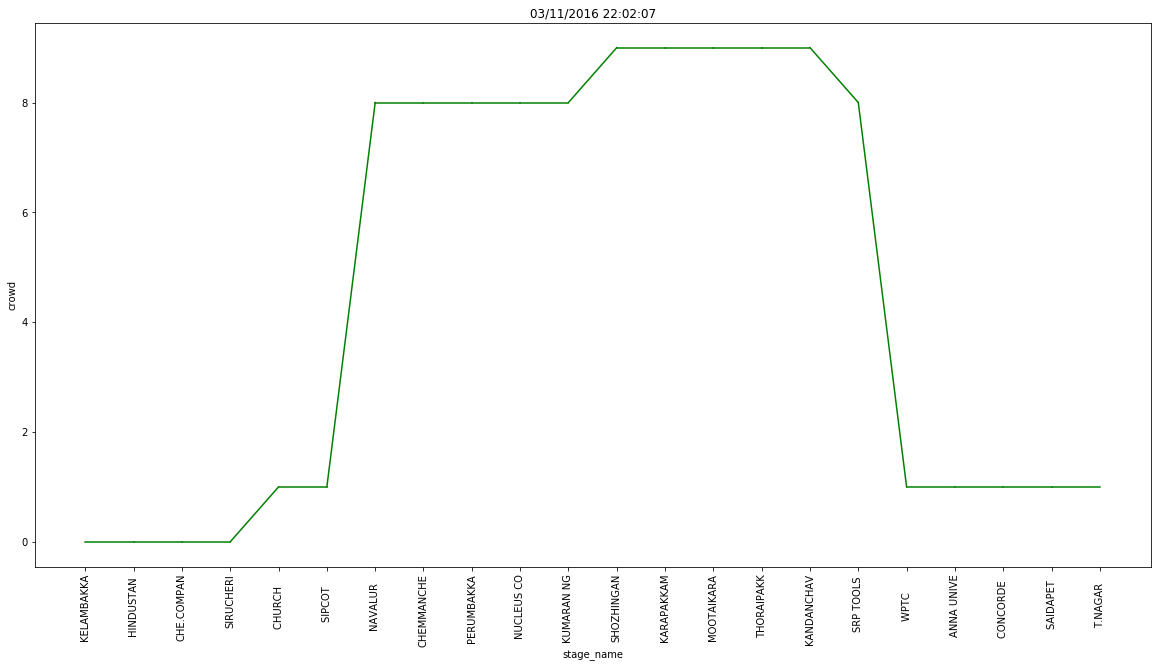

21:13:06
21:13:06
21:13:06
21:13:06
21:13:06


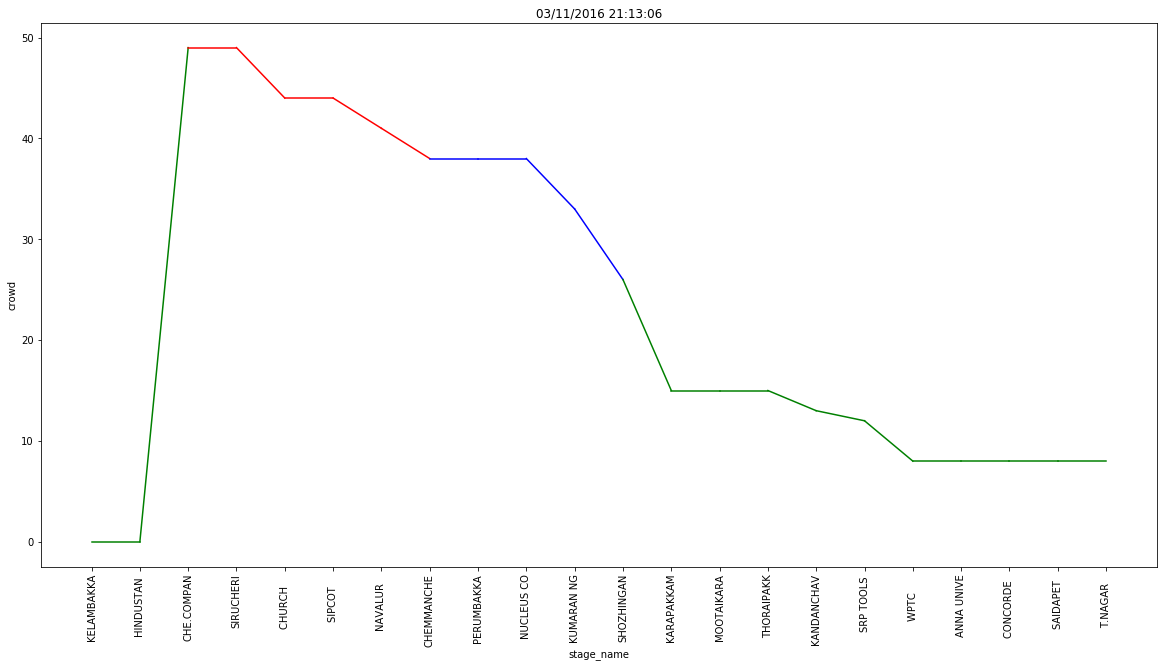

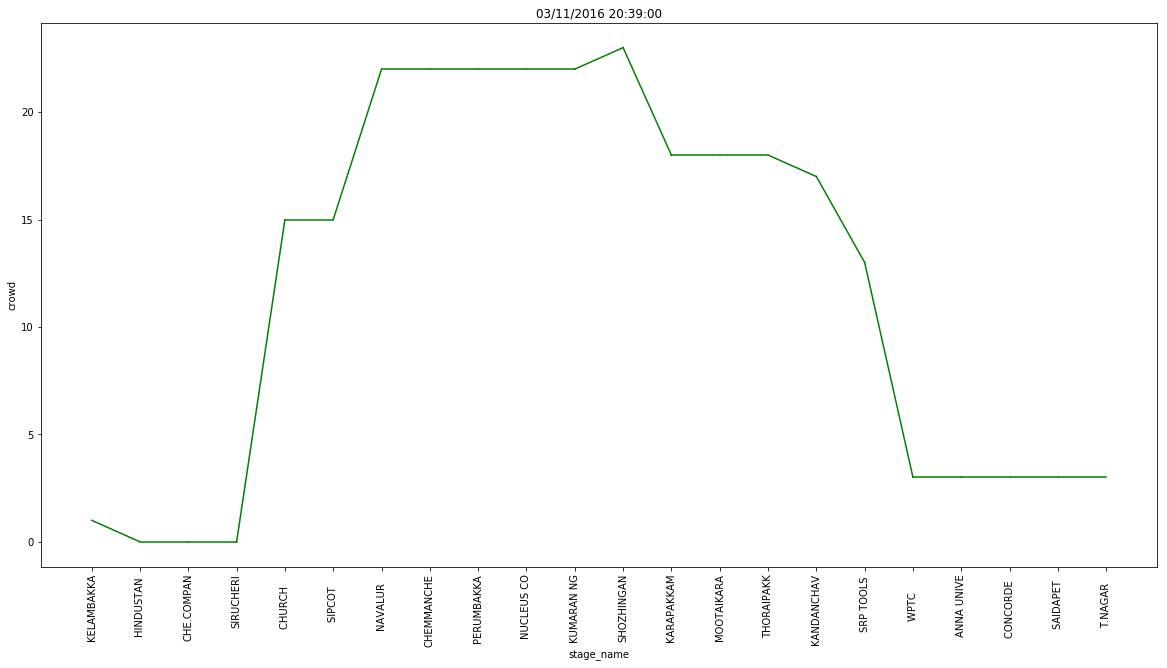

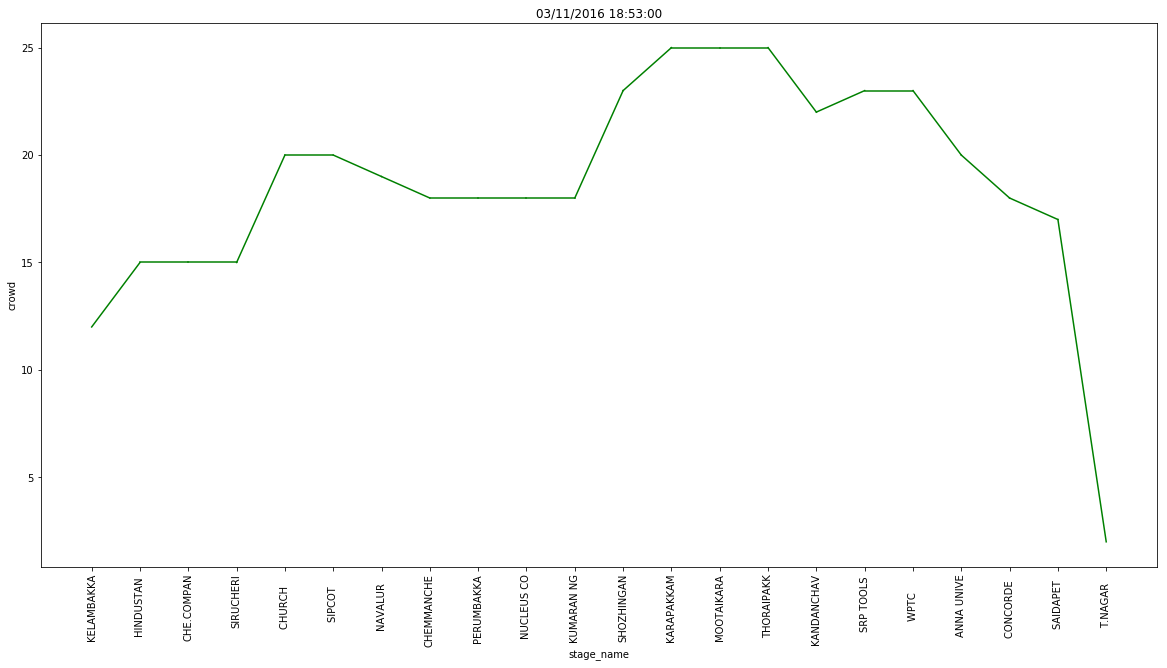

18:20:18
18:20:18
18:20:18
18:20:18
18:20:18
18:20:18
18:20:18
18:20:18


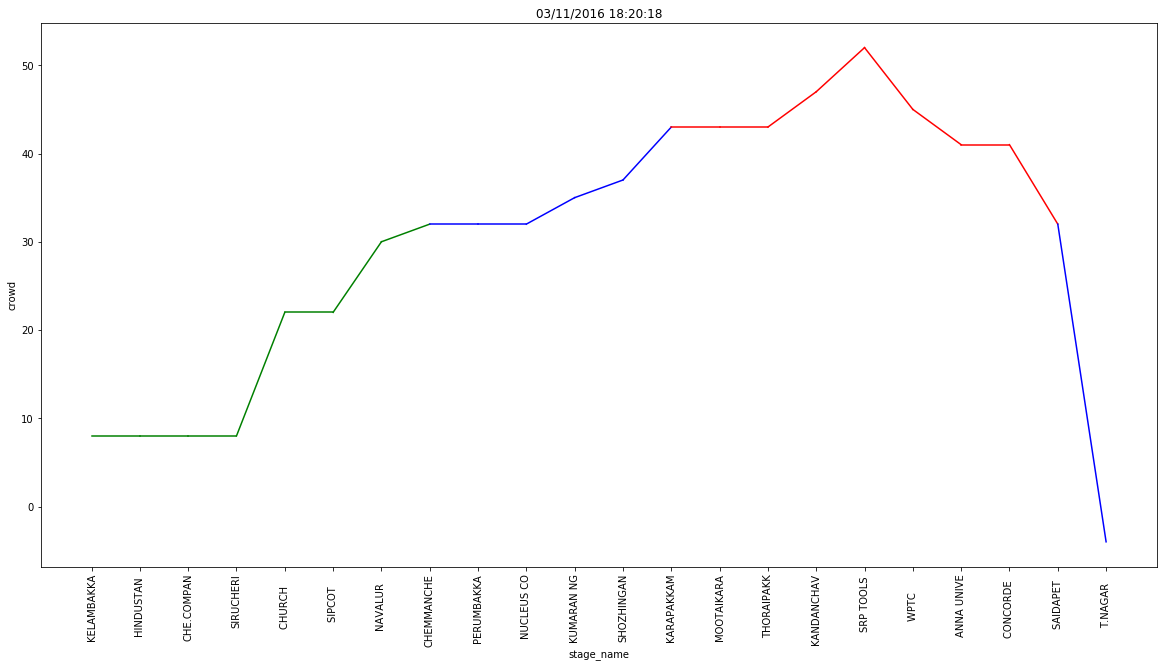

18:16:00
18:16:00
18:16:00
18:16:00
18:16:00
18:16:00
18:16:00
18:16:00
18:16:00
18:16:00


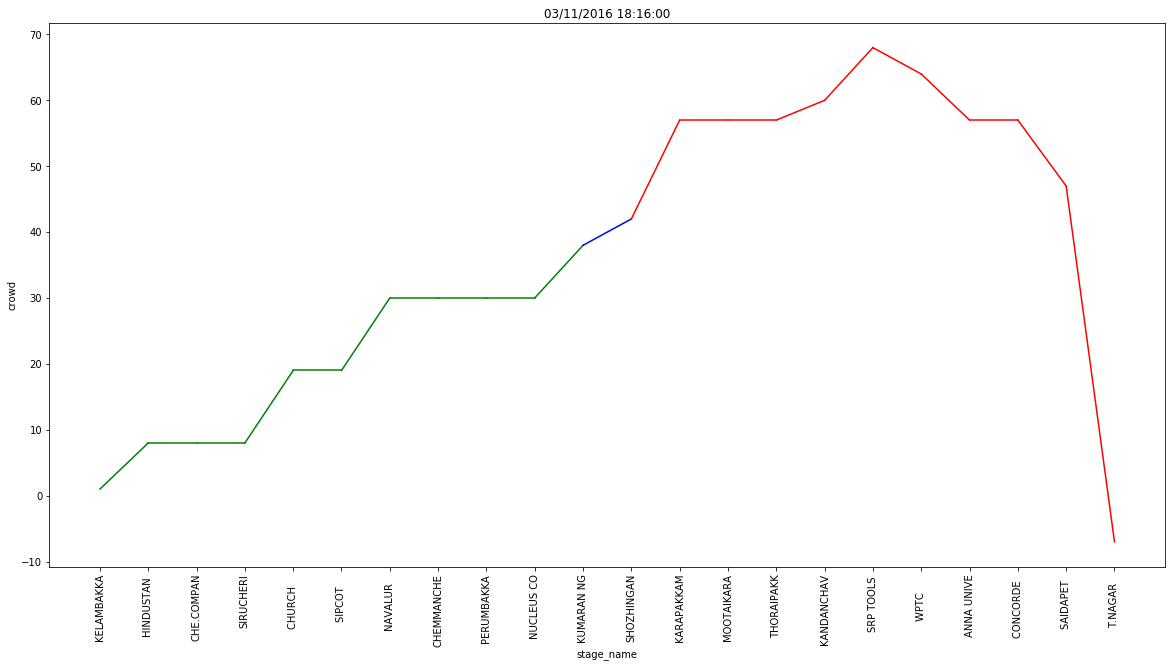

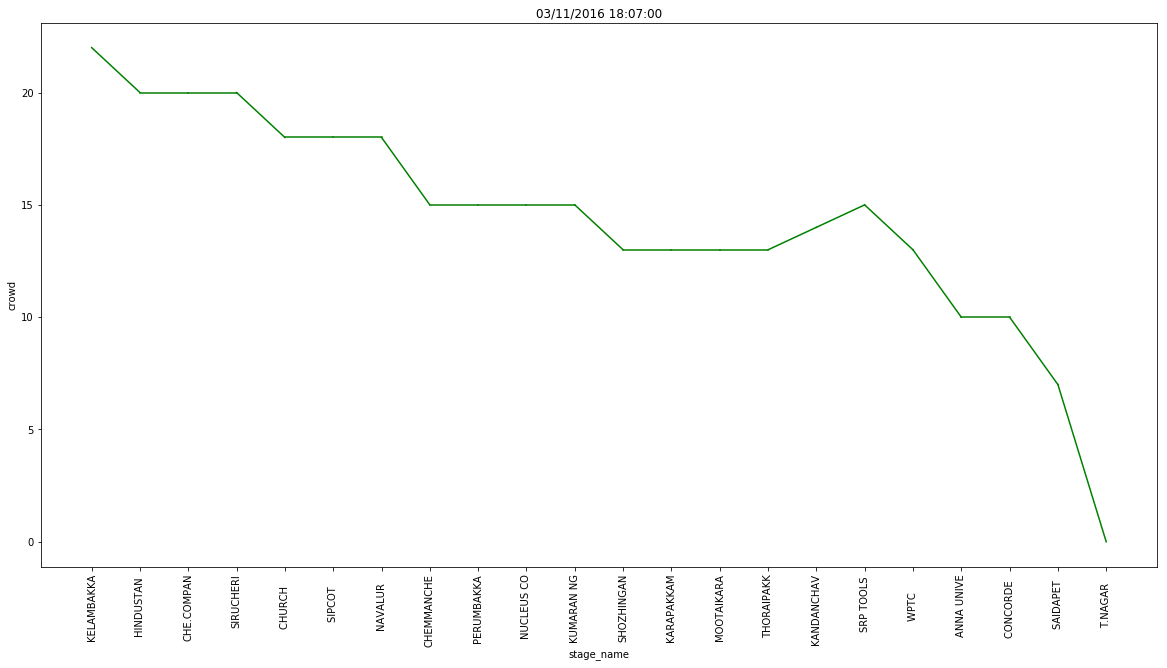

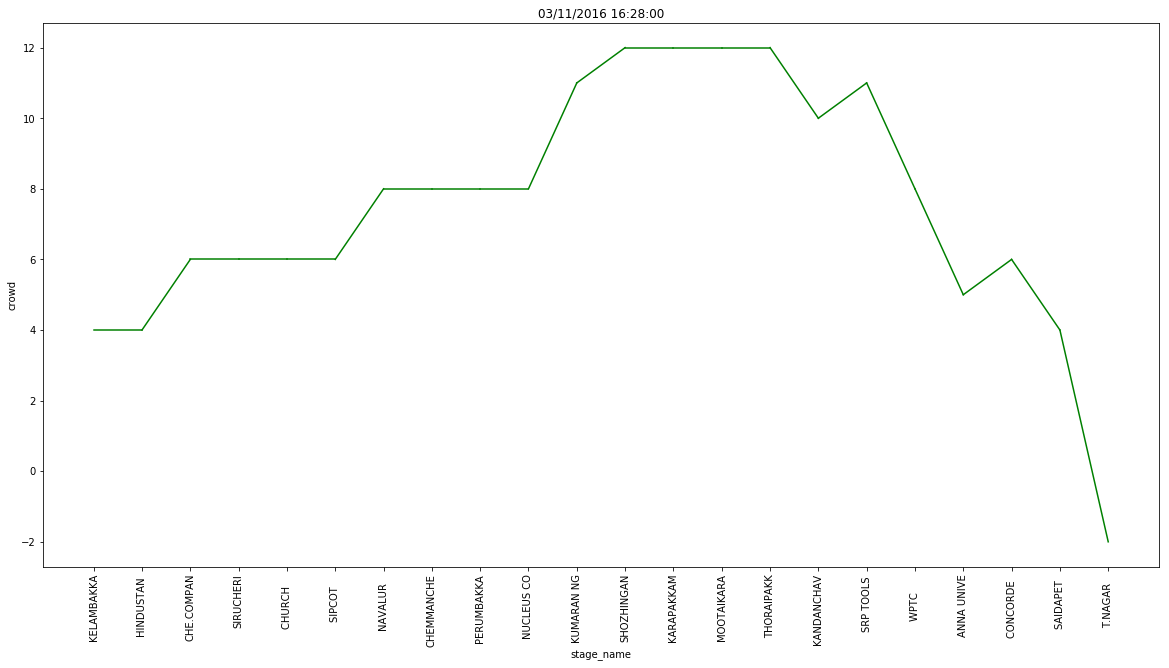

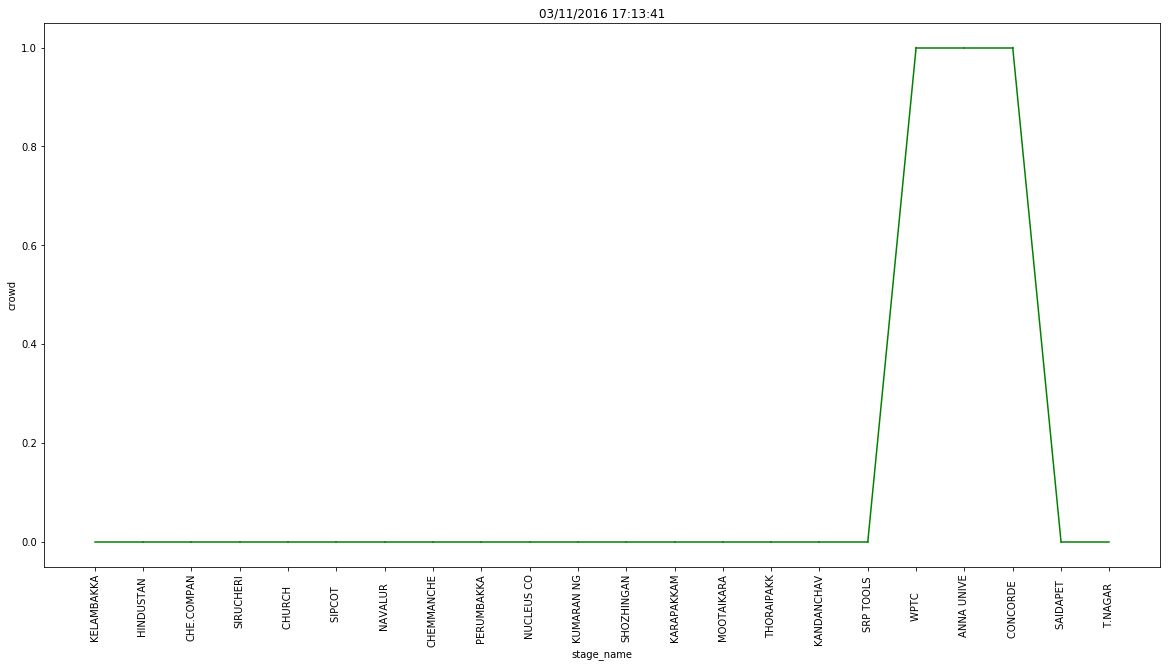

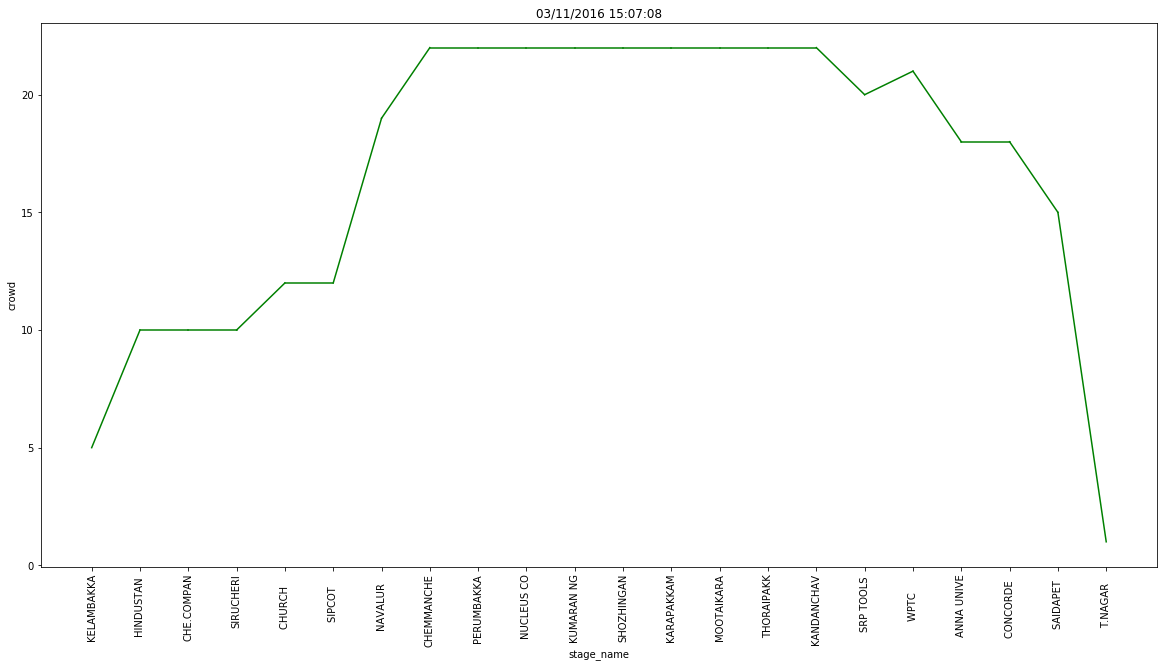

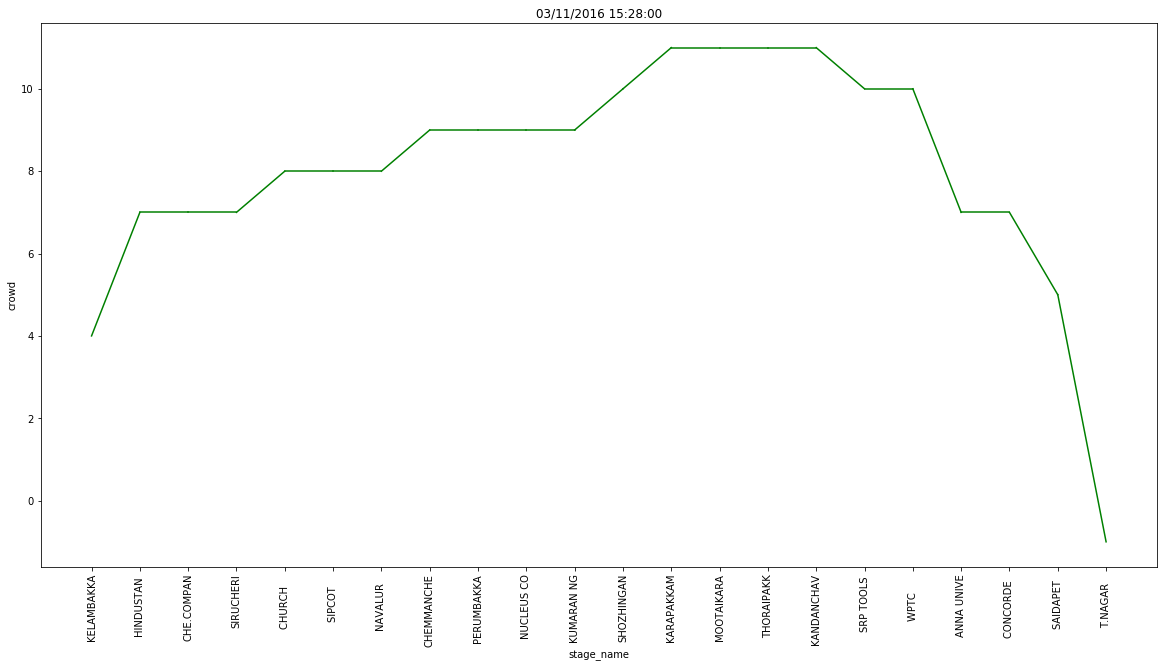

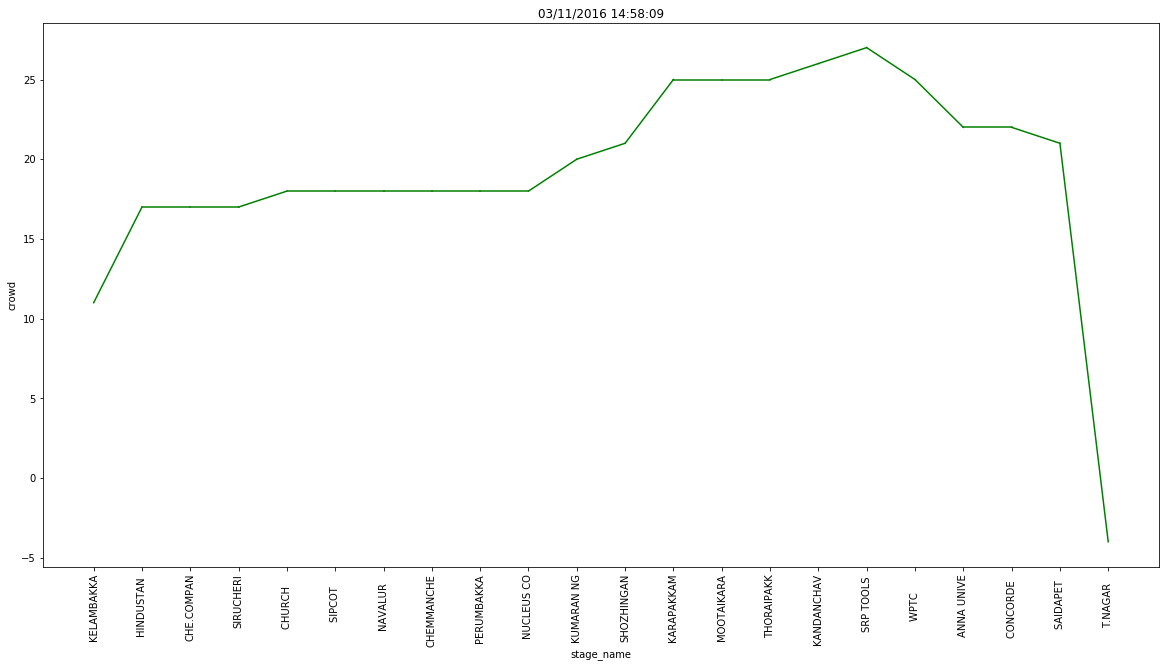

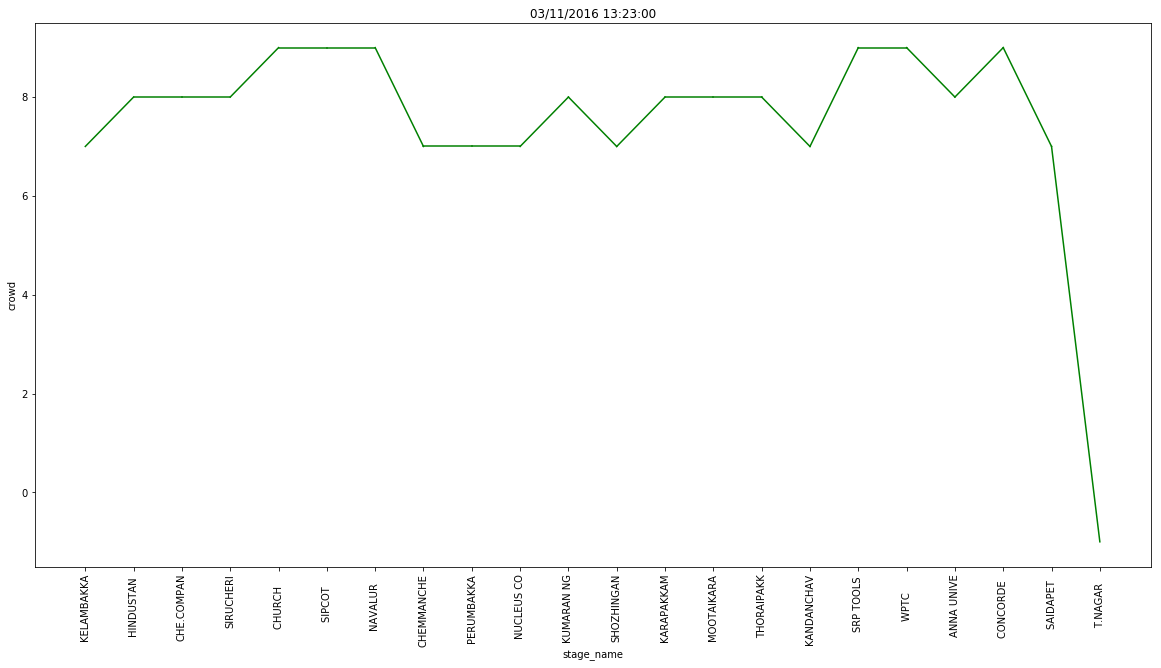

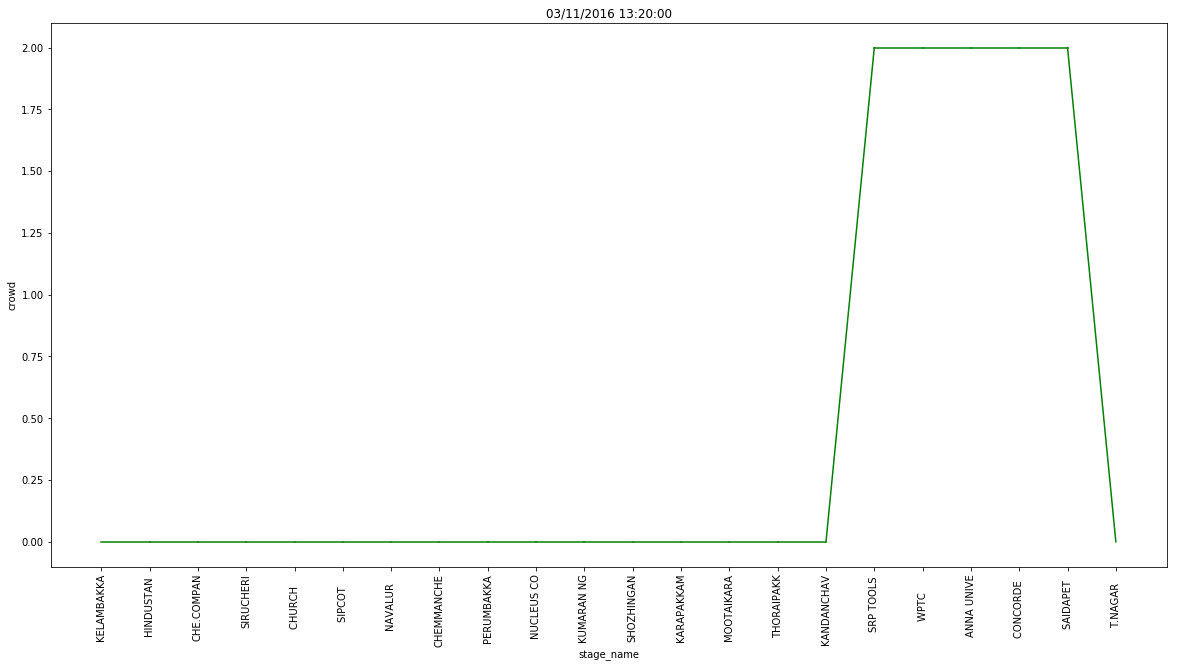

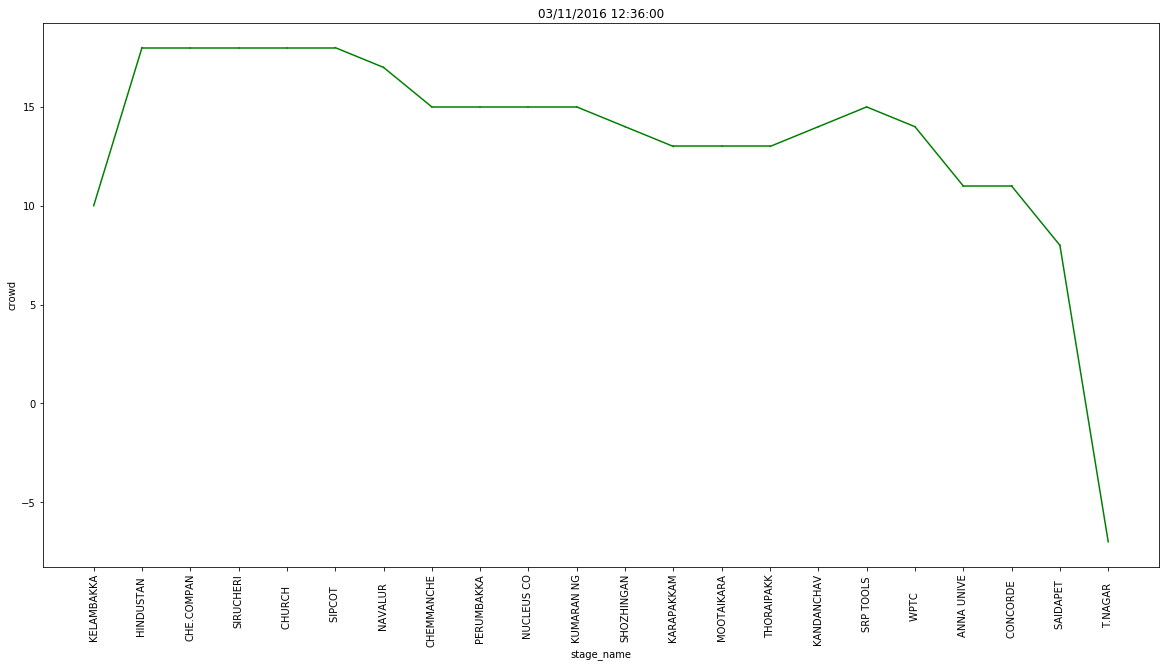

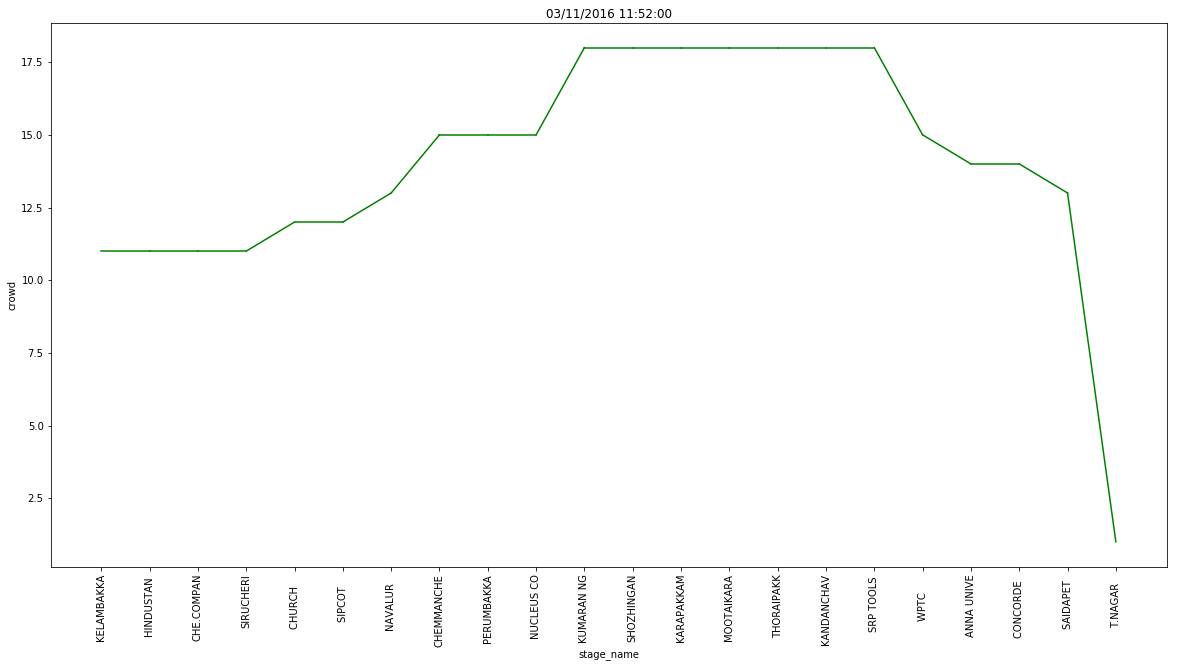

09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00
09:54:00


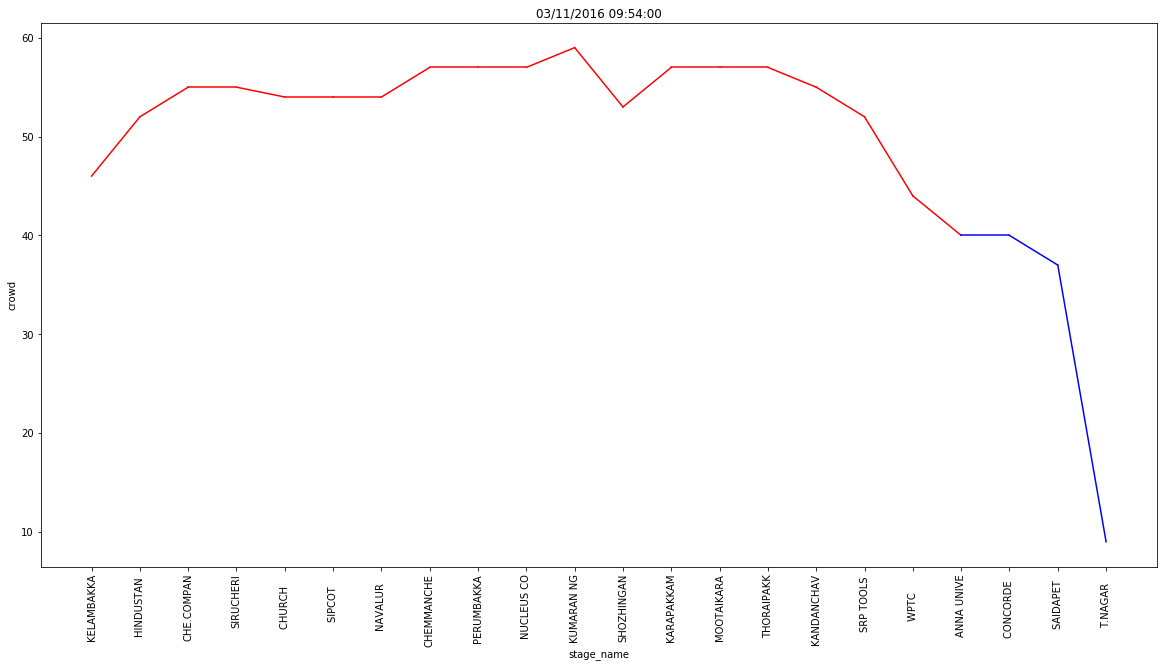

09:22:56
09:22:56


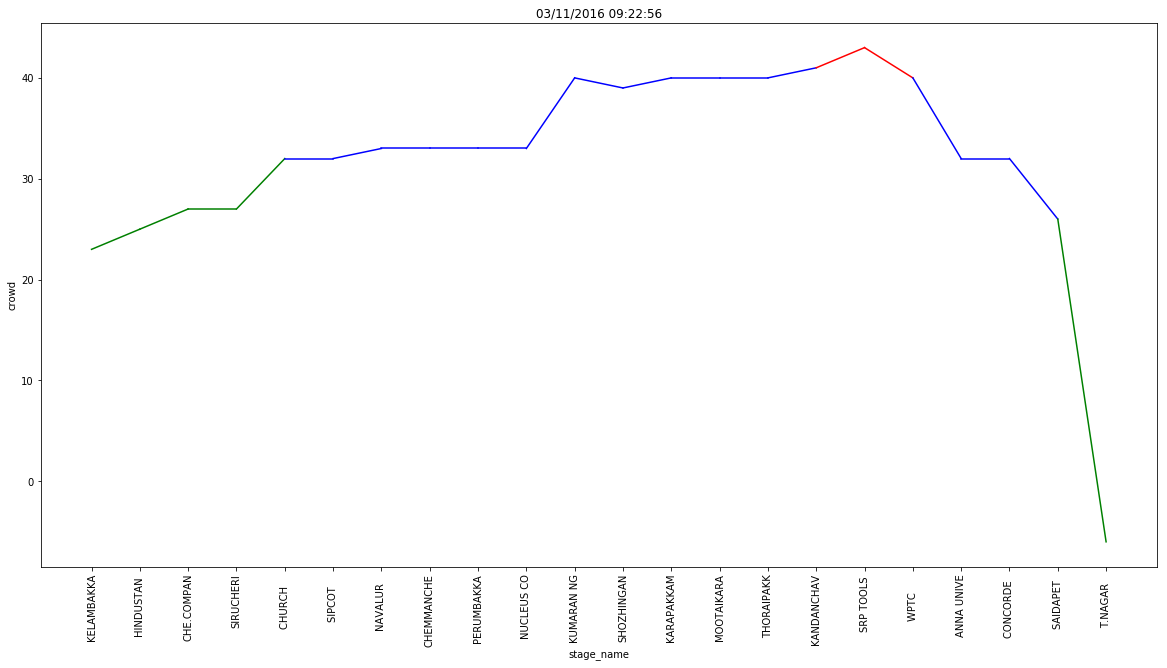

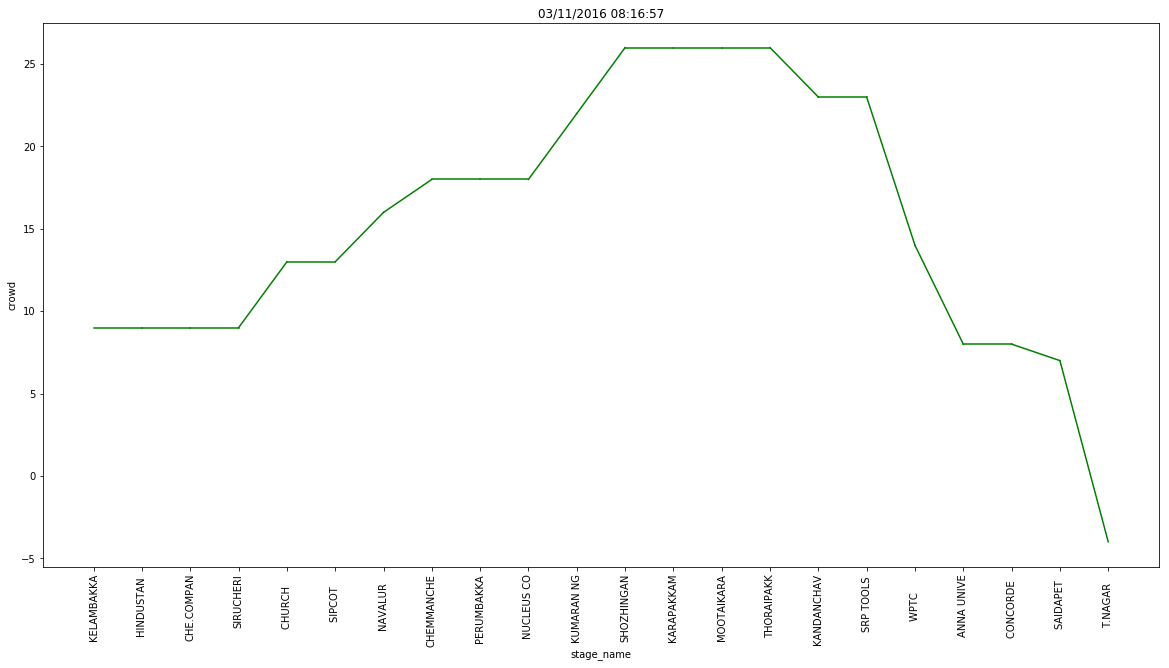

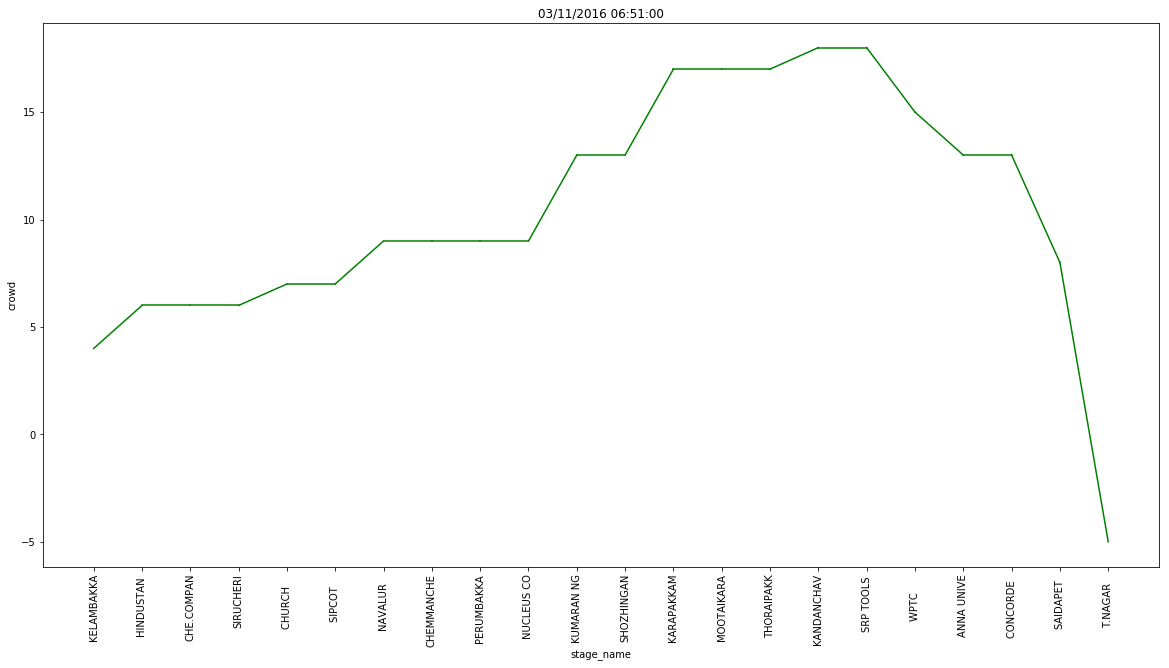

06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00
06:05:00


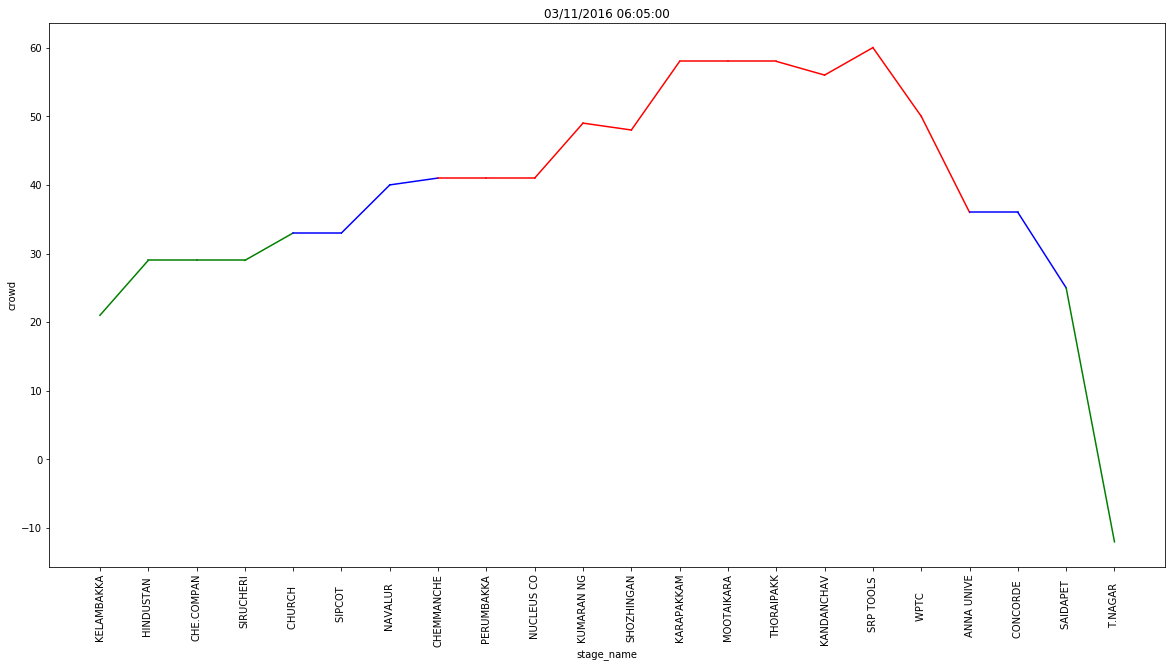

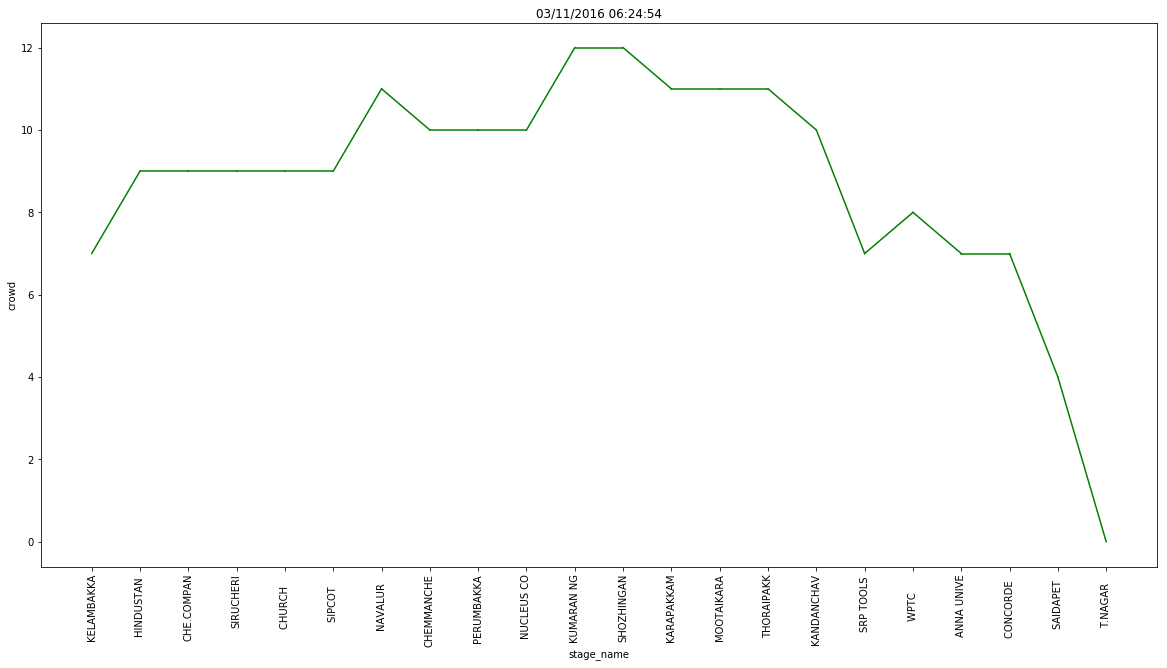

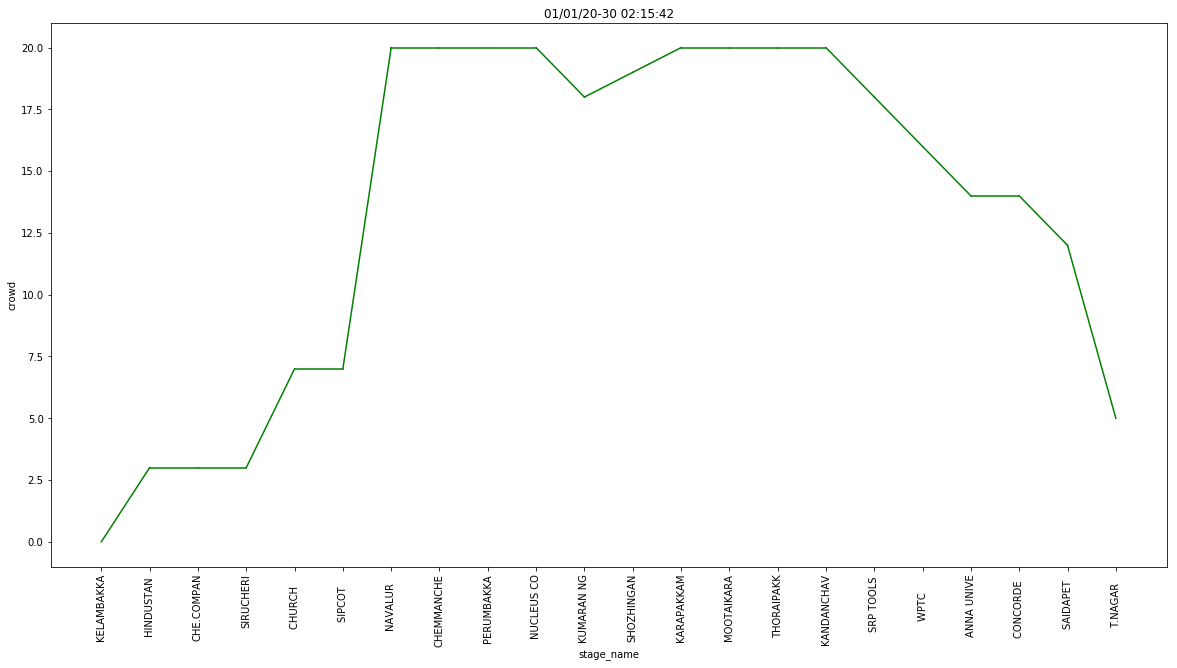

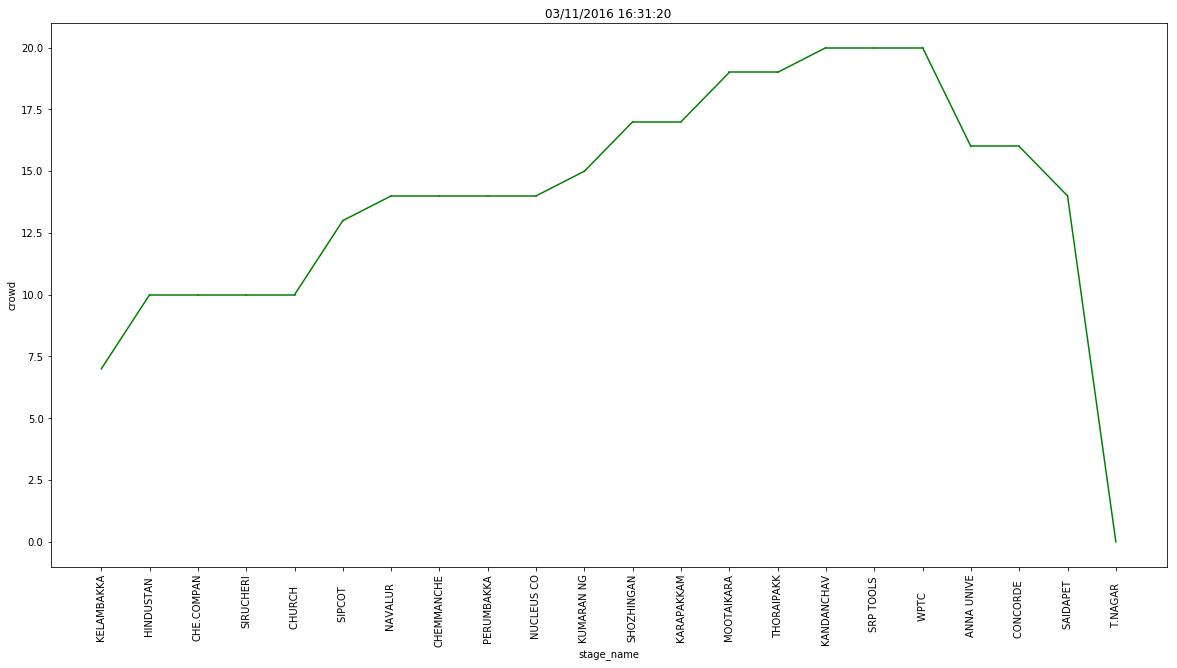

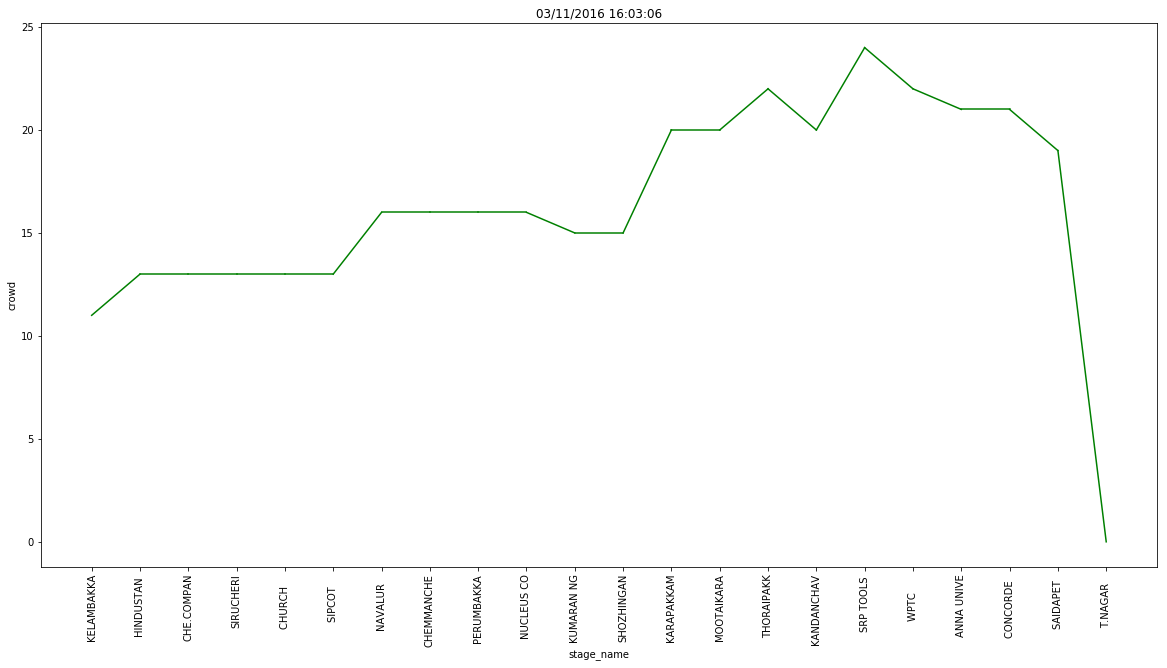

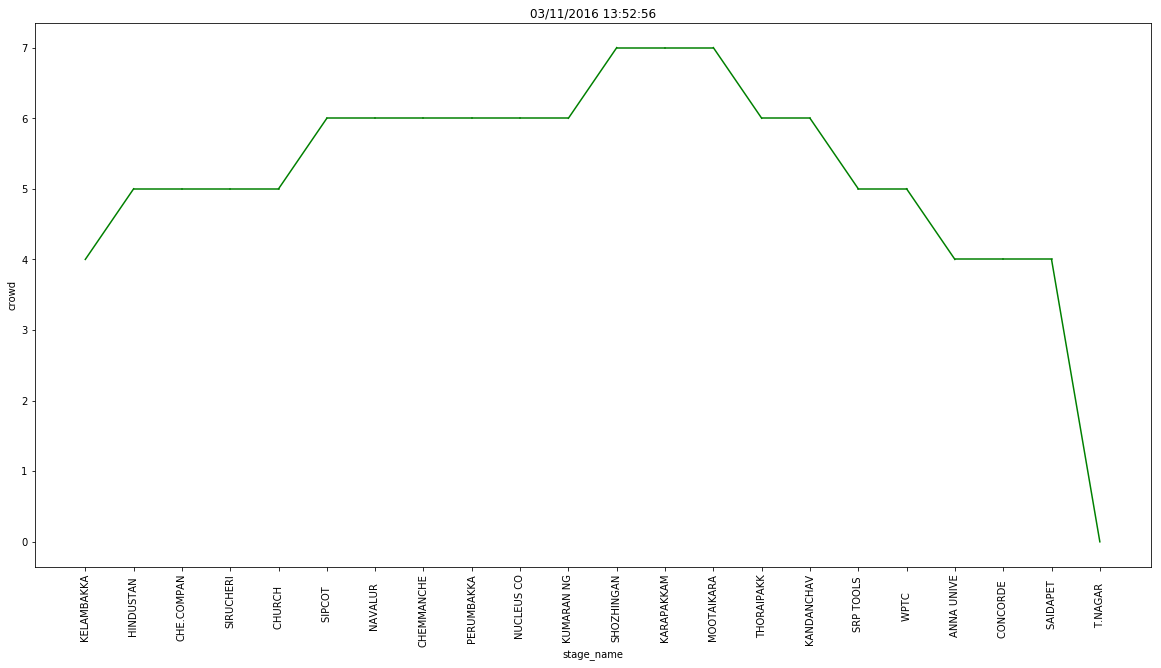

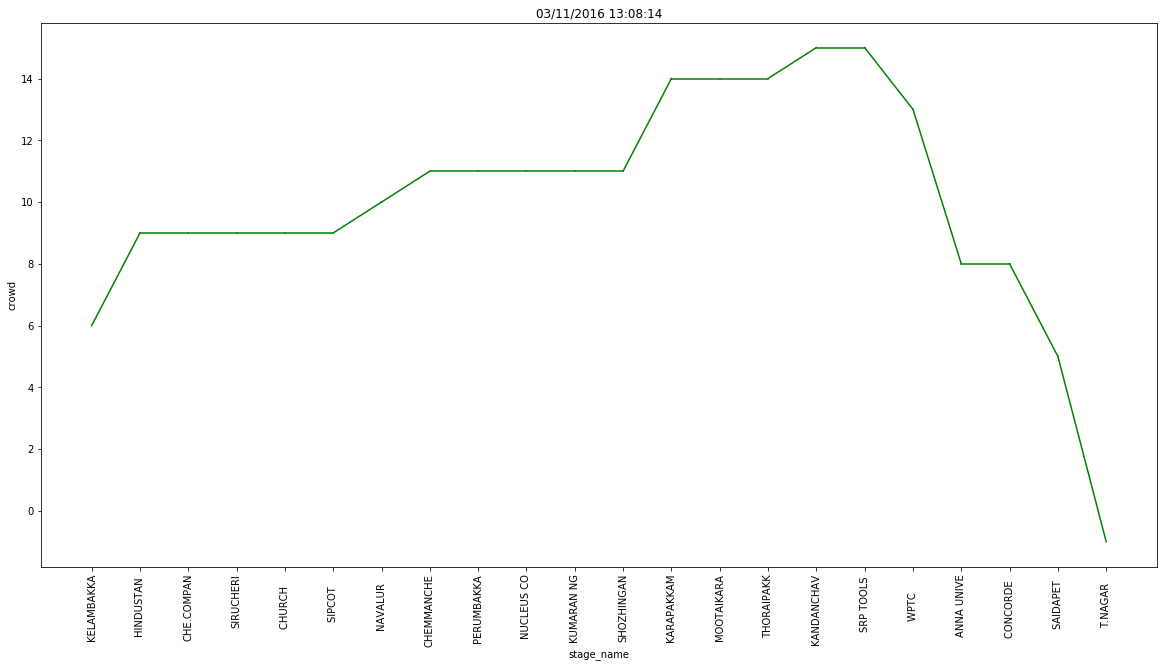

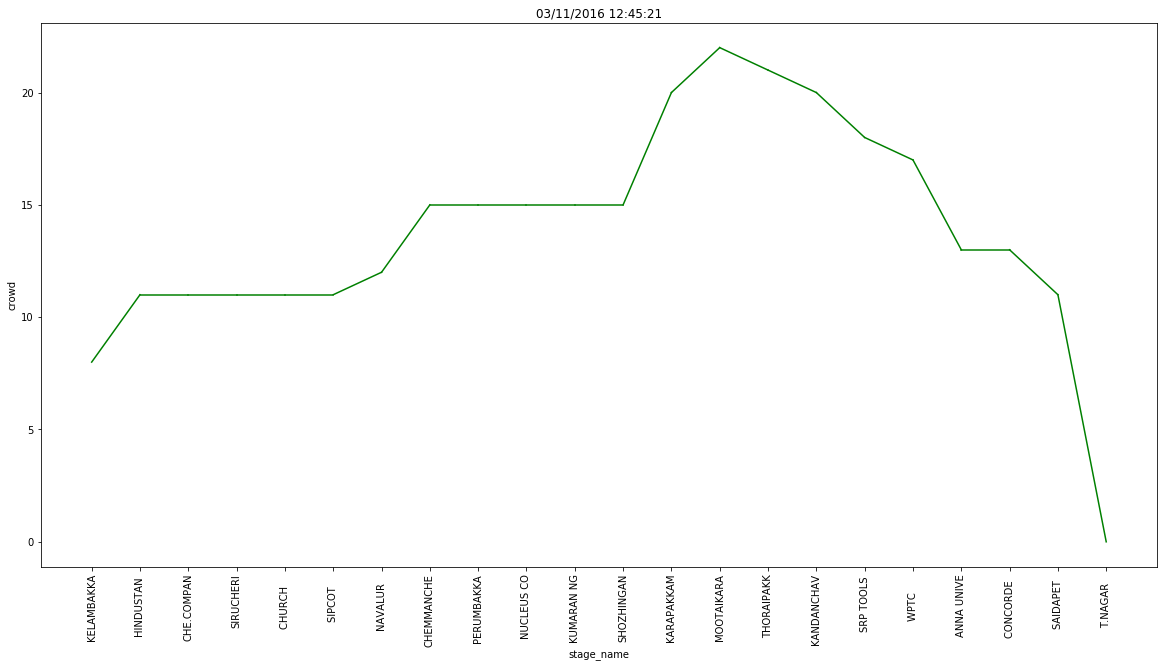

10:23:40
10:23:40
10:23:40
10:23:40


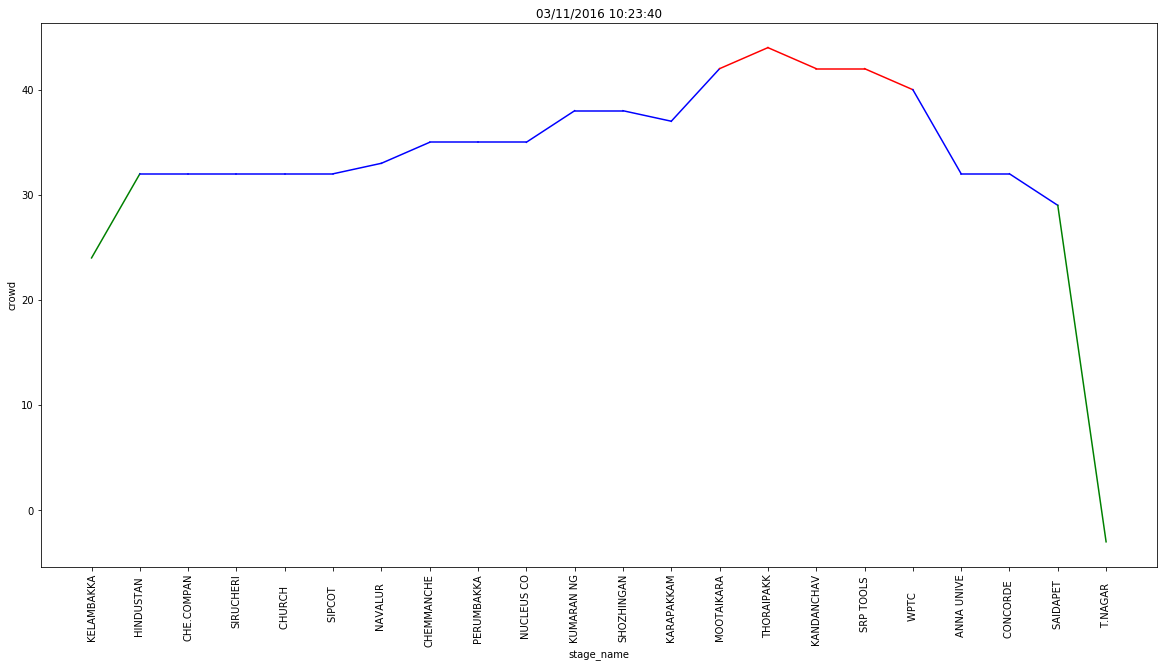

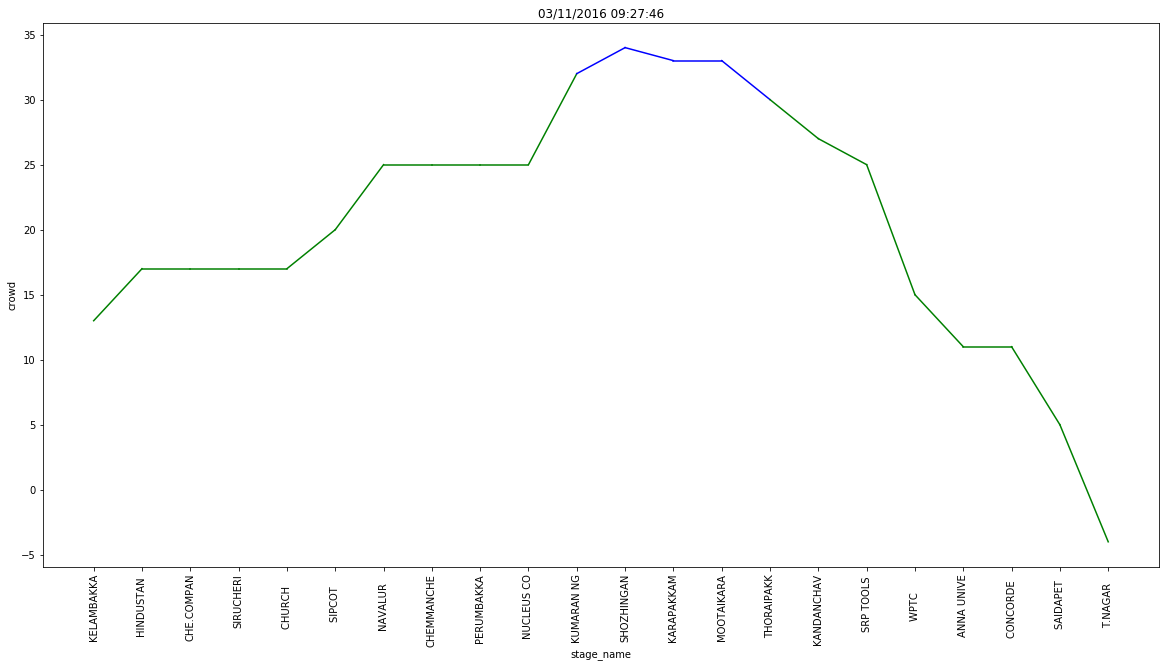

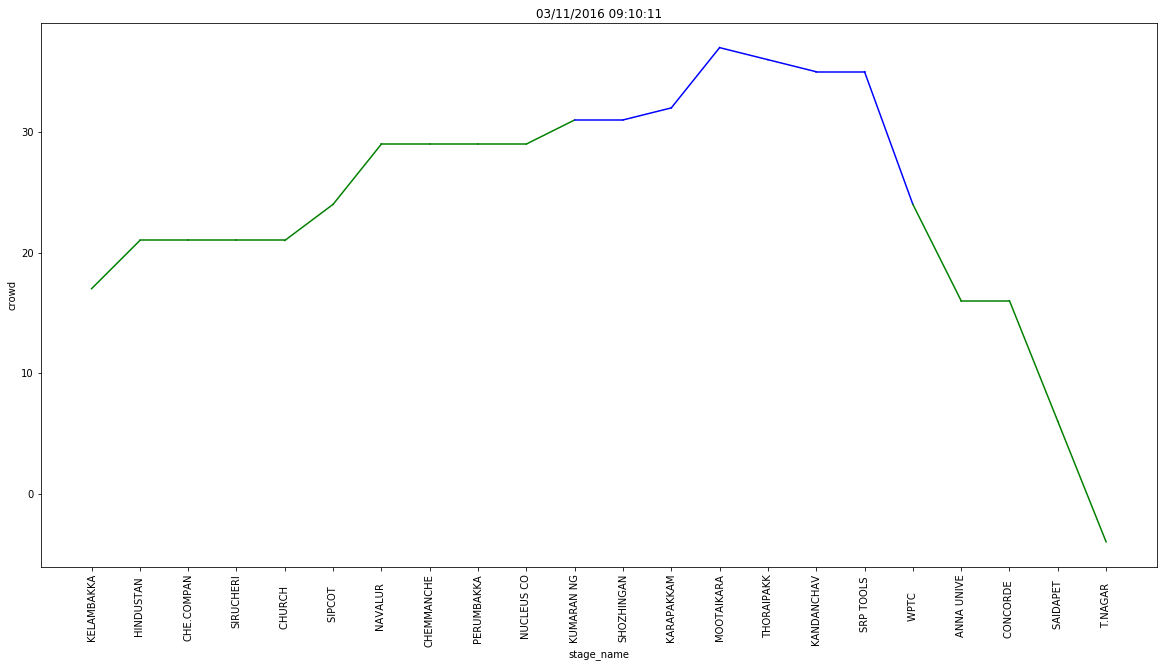

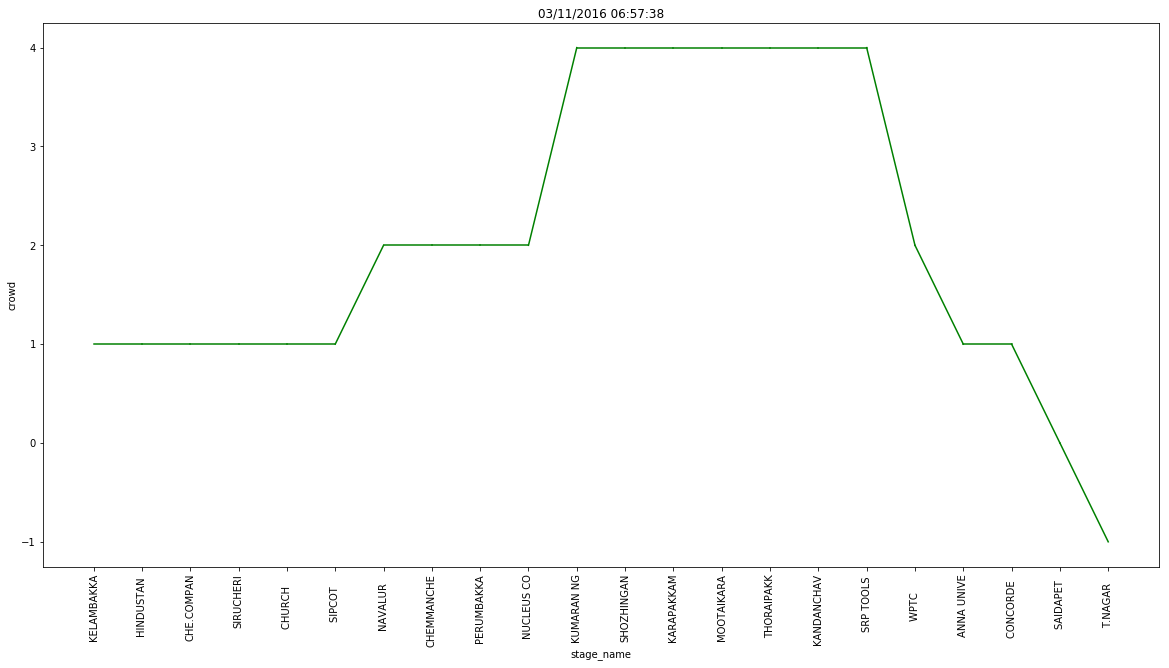

15:47:00


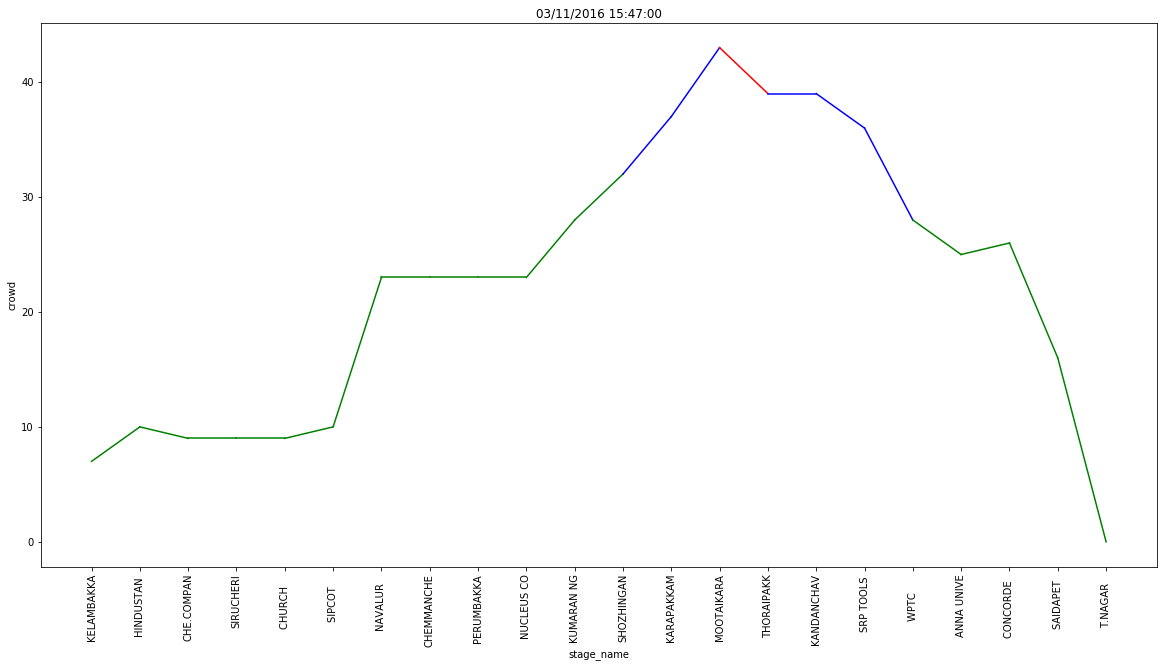

In [7]:
trips = np.array(df_source_destination['TripStartTime'].unique())
for trip in trips:
    df_source_destination_trip = df_source_destination[df_source_destination['TripStartTime']==trip]
    df_source_destination_trip = df_source_destination_trip.reset_index(drop=True)
    DF = pd.DataFrame()
    number_of_boardings = []
    number_of_alightings = []
    Source = []
    Destination = []
    Trip_start_time = []
    Schedule_name = []
    Trip_no = []
    number_of_interchanges = []
    for i in all_stages_19B:
        dest_array = np.array(df_source_destination_trip[df_source_destination_trip['FromStage']==i]['ToStage'].unique())
        number_of_interchanges.append(np.shape(dest_array)[0])
        trip_no = df_source_destination_trip['TripNo'].unique()[0]
        Trip_no.append(trip_no)
        schedule_name = df_source_destination_trip['Schedule_Name'].unique()[0]
        Schedule_name.append(schedule_name)
        source = df_source_destination_trip['Source'].unique()[0]
        Source.append(source)
        destination = df_source_destination_trip['Destination'].unique()[0]
        Destination.append(destination)
        trip_start_time = df_source_destination_trip['TripStartTime'].unique()[0]
        Trip_start_time.append(trip_start_time)
        adult_sum = df_source_destination_trip[df_source_destination_trip['FromStage']==i]['Adult'].sum()
        child_sum = df_source_destination_trip[df_source_destination_trip['FromStage']==i]['Child'].sum()
        total_sum = adult_sum + child_sum
        number_of_boardings.append(total_sum)
        adult_sum = df_source_destination_trip[df_source_destination_trip['ToStage']==i]['Adult'].sum()
        child_sum = df_source_destination_trip[df_source_destination_trip['ToStage']==i]['Child'].sum()
        total_sum = adult_sum + child_sum
        number_of_alightings.append(total_sum)
    stage_name = all_stages_19B
    number_of_boardings = np.array(number_of_boardings)
    number_of_alightings = np.array(number_of_alightings)
    Source = np.array(Source)
    Destination = np.array(Destination)
    Trip_start_time = np.array(Trip_start_time)
    stage_name = np.array(stage_name)
    d = {'Schedule_name':Schedule_name,'Trip_no':Trip_no,'Source':Source,'Destination' : Destination,'Trip_start_time':Trip_start_time, 'stage_name': stage_name,'number_of_boardings':number_of_boardings, 
             'number_of_alightings':number_of_alightings,'number_of_interchanges':number_of_interchanges}
    final_df = pd.DataFrame(data=d)
    DF = DF.append(final_df)
    arr_shape = np.shape(DF)[0]
    necs_arr = [0]*arr_shape
    necs_arr[0] = DF['number_of_boardings'][0]
    for i in range(1,arr_shape):
        necs_arr[i] = necs_arr[i-1] + DF['number_of_boardings'][i] - DF['number_of_alightings'][i]
    necs_arr = np.array(necs_arr)
    DF['crowd'] = necs_arr
    DF['crowding_level'] = [0 if x<=30 else 1 if x>30 and x<=40 else 2 for x in DF['crowd']]
    DF.crowding_level = DF.crowding_level.astype(int)
    x = DF['stage_name']
    y = DF['crowd']
    date = df_source_destination_trip['TripStartDate'].unique()[0]
    time = trip
    title_name = " ".join([date,time])
    plt.figure(figsize=(20,10))
    for x1, x2, y1,y2 in zip(x, x[1:], y, y[1:]):
        if y1<=30:
            plt.plot([x1,x2],[y1,y2],'green')
        elif y1>30 and y1<=40:
            plt.plot([x1,x2],[y1,y2],'blue')
        elif y1>40:
            plt.plot([x1,x2],[y1,y2],'red')
            print(trip)
    plt.xlabel('stage_name')
    plt.ylabel('crowd')
    plt.xticks(rotation=90)
    plt.title(title_name)
    plt.show()